 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [81]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
from datetime import datetime
import seaborn as sn
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [82]:
# Reading whale returns
whale_path = Path("./Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df.sort_index(inplace=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [83]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [84]:
# Drop nulls
whale_returns_df.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [85]:
# Reading algorithmic returns
algo_path = Path("./Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df.head()
algo_returns_df.sort_index(inplace=True)

In [86]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [87]:
# Drop nulls
algo_returns_df.dropna(inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [88]:
# Reading S&P 500 Closing Prices
sp500_his_path = Path("./Resources/sp500_history.csv")
sp500_his_df = pd.read_csv(sp500_his_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_his_df.sort_index(inplace=True)

In [89]:
# Check Data Types
sp500_his_df.dtypes

Close    object
dtype: object

In [90]:
# Fix Data Types
sp500_his_df["Close"] = sp500_his_df["Close"].str.replace("$","")
sp500_his_df["Close"] = sp500_his_df["Close"].str.replace(",","")
sp500_his_df["Close"] = sp500_his_df["Close"].astype('float')
sp500_his_df.dtypes

/tmp/ipykernel_8702/3995145310.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_his_df["Close"] = sp500_his_df["Close"].str.replace("$","")


Close    float64
dtype: object

In [91]:
# Calculate Daily Returns
sp500_returns_df = sp500_his_df.pct_change()

In [92]:
# Drop nulls
sp500_returns_df.dropna(inplace=True)

In [93]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns_df = sp500_returns_df.rename(columns={"Close": "S&P500 Return"})
sp500_returns_df.head()


,S&P500 Return
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [94]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns_df = pd.concat([whale_returns_df, algo_returns_df, sp500_returns_df], axis="columns", join="inner")
all_returns_df.sort_index(inplace=True)
all_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500 Return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

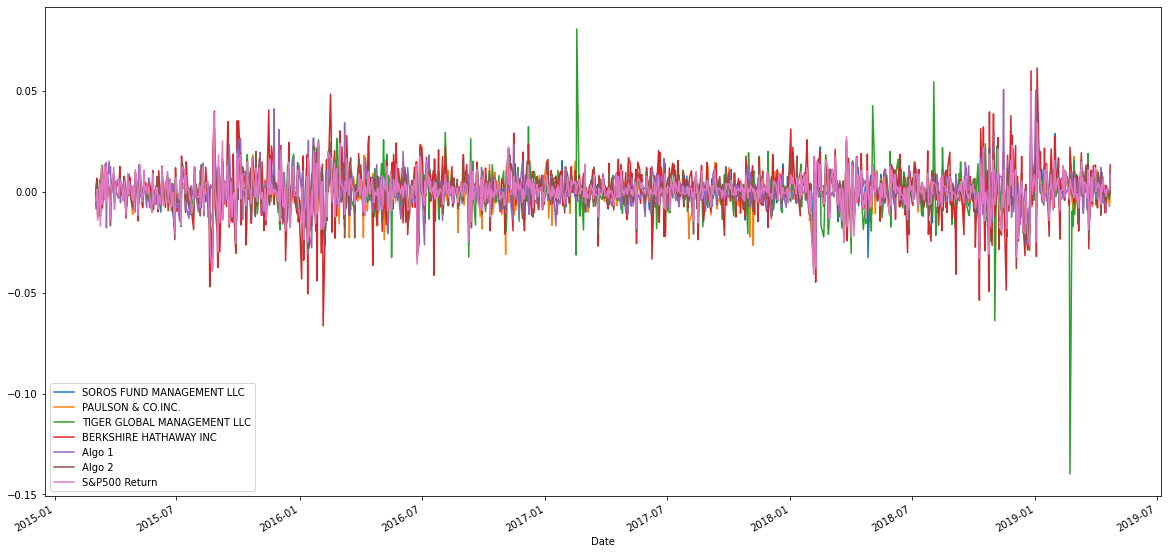

In [95]:
# Plot daily returns of all portfolios
all_returns_df.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

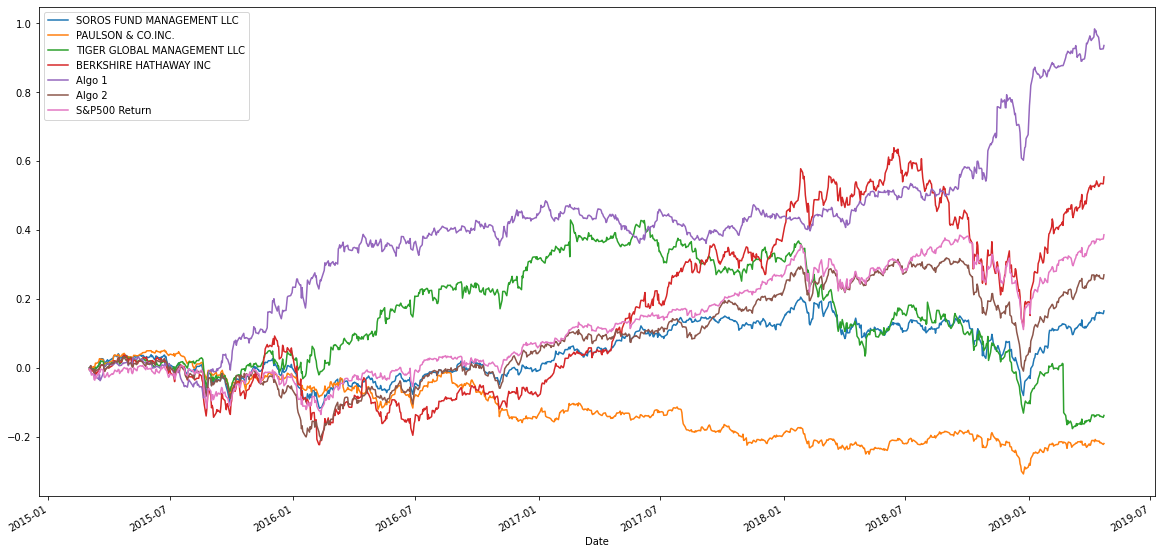

In [96]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_returns_df).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

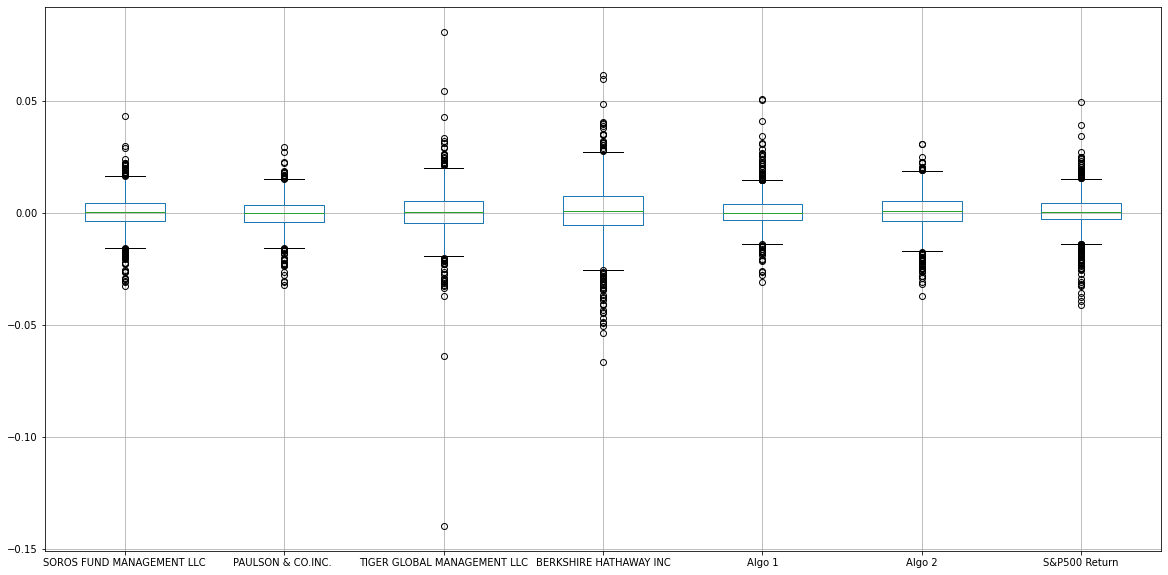

In [97]:
# Box plot to visually show risk
all_returns_df.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [98]:
# Calculate the daily standard deviations of all portfolios
std_of_portfolios = all_returns_df.std().sort_values()
std_of_portfolios

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P500 Return                  0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [99]:
# Determine which portfolios are riskier than the S&P 500
#From the std above, Tiger Global Management and Berkshire are higher in risk than the S&P 500

### Calculate the Annualized Standard Deviation

In [100]:
# Calculate the annualized standard deviation (252 trading days)
volatility = all_returns_df.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P500 Return                  0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

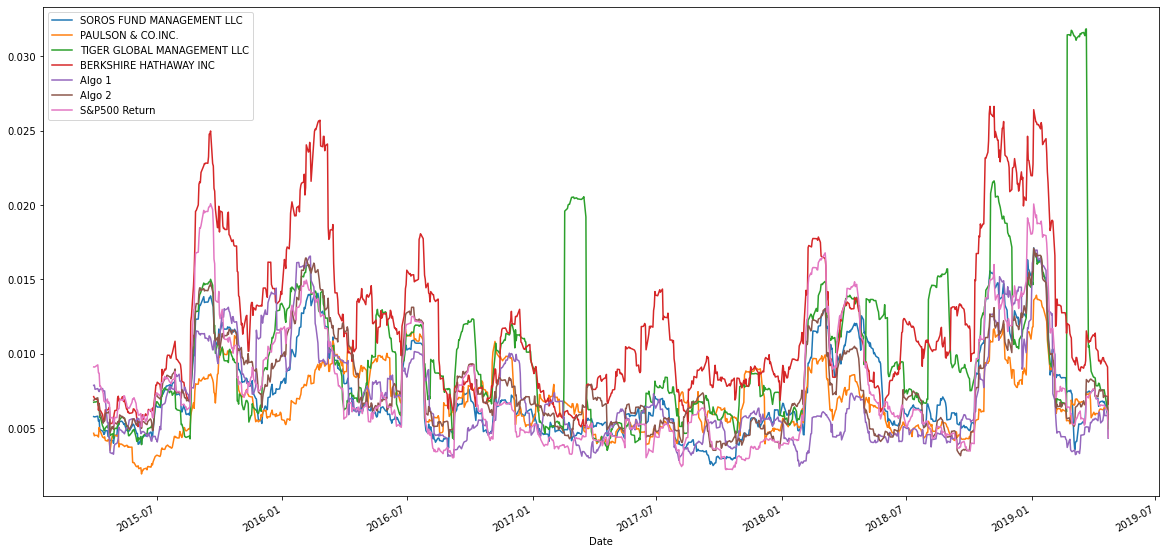

In [101]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21_day_std_df = all_returns_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_21_day_std_df.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

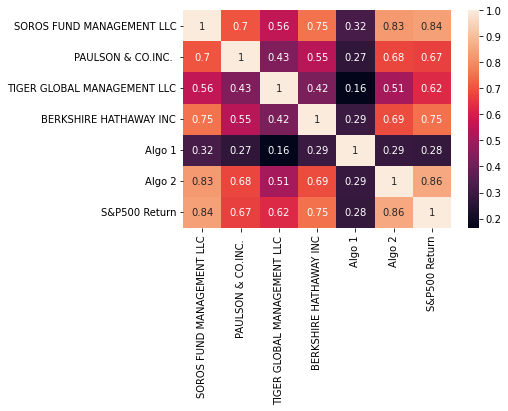

In [102]:
# Calculate the correlation
portfolio_correlation = all_returns_df.corr()
portfolio_correlation
# Display de correlation matrix
sn.heatmap(portfolio_correlation, annot=True)

### Calculate and Plot 60 day rolling Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

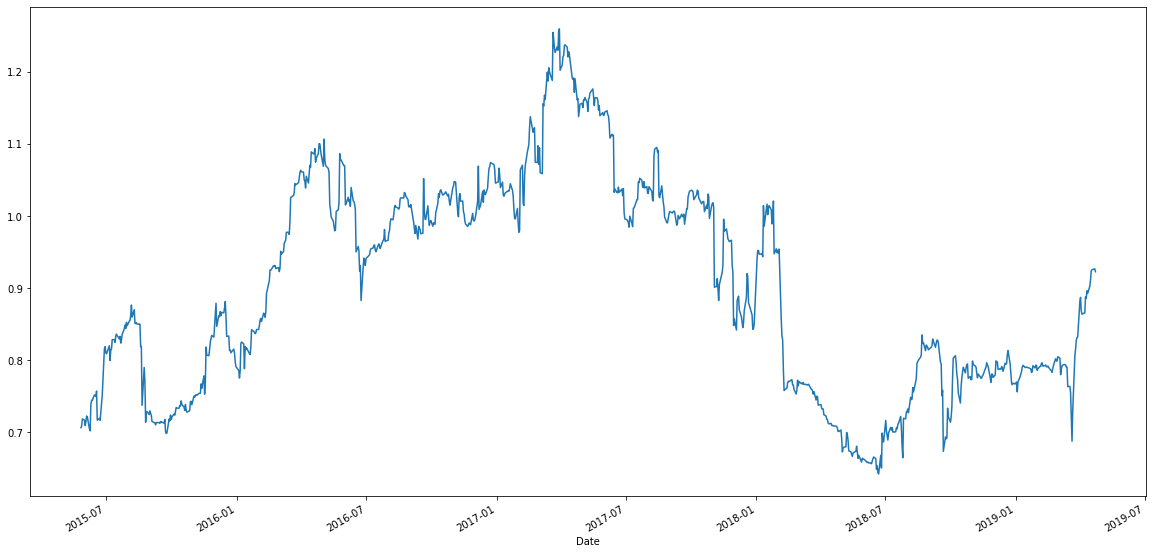

In [103]:
# Calculate covariance of a single portfolio
covariance = all_returns_df["Algo 2"].rolling(window=60).cov(all_returns_df["S&P500 Return"])
# Calculate variance of S&P 500
variance = all_returns_df["S&P500 Return"].rolling(window=60).var()
# Computing beta
algo_beta = covariance/variance
# Plot beta trend
algo_beta.plot(figsize=(20, 10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

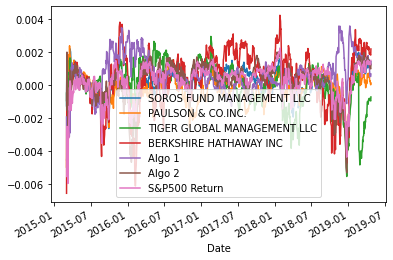

In [104]:
# Use `ewm` to calculate the rolling window
ewm_returns = all_returns_df.ewm(halflife=21).mean()
ewm_returns.plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [105]:
# Annualized Sharpe Ratios
sharpe_ratios = all_returns_df.mean()/all_returns_df.std()

<AxesSubplot:>

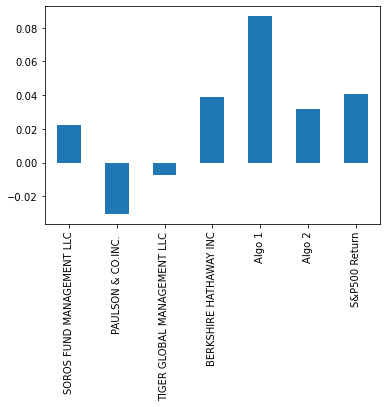

In [106]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---Algorithmic strategy 1 outperforms both the S&P 500 and Whale portfolios

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [107]:
# Reading data from Bitcoin 
btc_path = Path("./Resources/btc_history_2017.csv")
btc_returns_df = pd.read_csv(btc_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
btc_returns_df.sort_index(inplace=True)
btc_returns_df.head()

,Close
Date,
2017-01-01,992.95
2017-01-02,1011.45
2017-01-03,1020.67
2017-01-04,1130.30
2017-01-05,1007.00


In [108]:
# Reading data from Etherium
eth_path = Path("./Resources/eth_history_2017.csv")
eth_returns_df = pd.read_csv(eth_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
eth_returns_df.sort_index(inplace=True)
eth_returns_df.head()

,Close
Date,
2017-01-01,8.18
2017-01-02,8.38
2017-01-03,9.59
2017-01-04,11.17
2017-01-05,10.23


In [109]:
# Reading data from AMD
AMD_path = Path("./Resources/AMD_history_2017.csv")
AMD_returns_df = pd.read_csv(AMD_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
AMD_returns_df.sort_index(inplace=True)
AMD_returns_df.head()

,Close
Date,
2017-01-03,11.43
2017-01-04,11.43
2017-01-05,11.24
2017-01-06,11.32
2017-01-09,11.49


In [110]:
# Combine all stocks in a single DataFrame
crypto_stock_df = pd.concat([btc_returns_df, eth_returns_df, AMD_returns_df], axis="columns", join="inner")
crypto_stock_df.sort_index(inplace=True)
crypto_stock_df.head()

,Close,Close,Close
Date,,,
2017-01-03,1020.67,9.59,11.43
2017-01-04,1130.30,11.17,11.43
2017-01-05,1007.00,10.23,11.24
2017-01-06,895.71,10.14,11.32
2017-01-09,902.66,10.39,11.49


In [111]:
# Reset Date index


In [112]:
# Reorganize portfolio data by having a column per symbol
crypto_stock_df.columns = ['BTC','ETH','AMD']
crypto_stock_df.head()

,BTC,ETH,AMD
Date,,,
2017-01-03,1020.67,9.59,11.43
2017-01-04,1130.30,11.17,11.43
2017-01-05,1007.00,10.23,11.24
2017-01-06,895.71,10.14,11.32
2017-01-09,902.66,10.39,11.49


In [113]:
# Calculate daily returns
crypto_returns_df = crypto_stock_df.pct_change()
# Drop NAs
crypto_returns_df.dropna(inplace=True)
# Display sample data
crypto_returns_df.head()

,BTC,ETH,AMD
Date,,,
2017-01-04,0.107410,0.164755,0.000000
2017-01-05,-0.109086,-0.084154,-0.016623
2017-01-06,-0.110516,-0.008798,0.007117
2017-01-09,0.007759,0.024655,0.015018
2017-01-10,0.004808,0.023099,-0.004352


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [114]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
new_portfolio_returns_df = crypto_returns_df.dot(weights)
# Display sample data
new_portfolio_returns_df.head()

Date
2017-01-04    0.090722
2017-01-05   -0.069954
2017-01-06   -0.037399
2017-01-09    0.015811
2017-01-10    0.007852
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [115]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


In [116]:
final_returns_df = pd.concat([all_returns_df,new_portfolio_returns_df], axis="columns", join="inner")
final_returns_df.sort_index(inplace=True)
final_returns_df.rename(columns={final_returns_df.columns[7]:'NEW'}, inplace=True) 
final_returns_df.dropna()
final_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500 Return,NEW
Date,,,,,,,,
2017-01-04,0.011581,0.007029,-0.001011,0.012204,0.012510,0.014701,0.005722,0.090722
2017-01-05,0.003079,0.004107,-0.004264,0.016092,-0.003955,-0.001872,-0.000771,-0.069954
2017-01-06,0.003561,-0.013250,-0.001213,0.005667,-0.000364,0.000051,0.003517,-0.037399
2017-01-09,-0.000458,0.002007,-0.004540,-0.002642,0.002775,-0.006277,-0.003549,0.015811
2017-01-10,-0.001490,0.000394,-0.000718,0.010586,0.007669,0.006618,0.000000,0.007852


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [117]:
# Calculate the annualized `std`
volatility_final = final_returns_df.std() * np.sqrt(252)
volatility_final.sort_values(inplace=True)
volatility_final

Algo 1                         0.103017
PAULSON & CO.INC.              0.106665
Algo 2                         0.118768
SOROS FUND MANAGEMENT LLC      0.125160
S&P500 Return                  0.129579
TIGER GLOBAL MANAGEMENT LLC    0.168741
BERKSHIRE HATHAWAY INC         0.197256
NEW                            0.666973
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

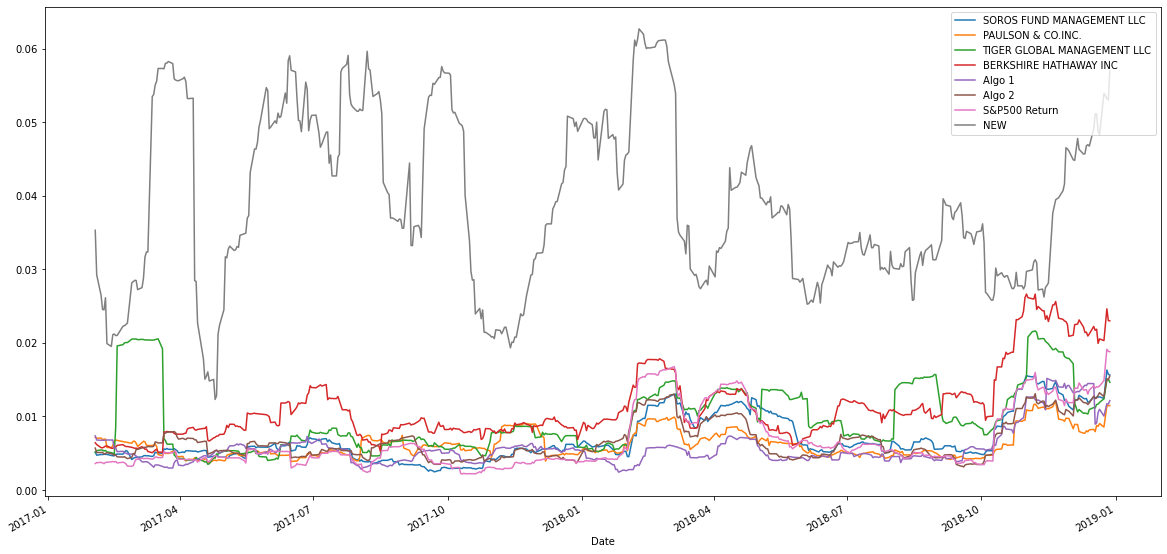

In [118]:
# Calculate rolling standard deviation
rolling_21_day_std_df_final = final_returns_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_21_day_std_df_final.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

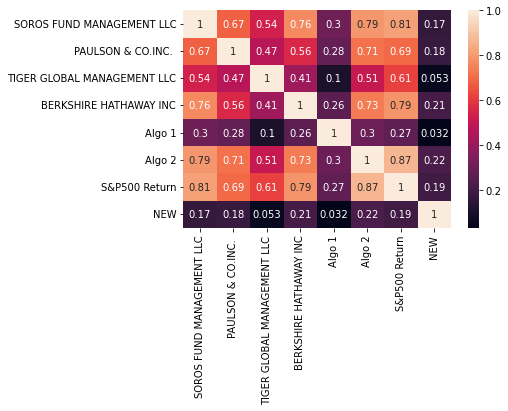

In [119]:
# Calculate and plot the correlation
portfolio_correlation_final = final_returns_df.corr()
portfolio_correlation_final
# Display de correlation matrix
sn.heatmap(portfolio_correlation_final, annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

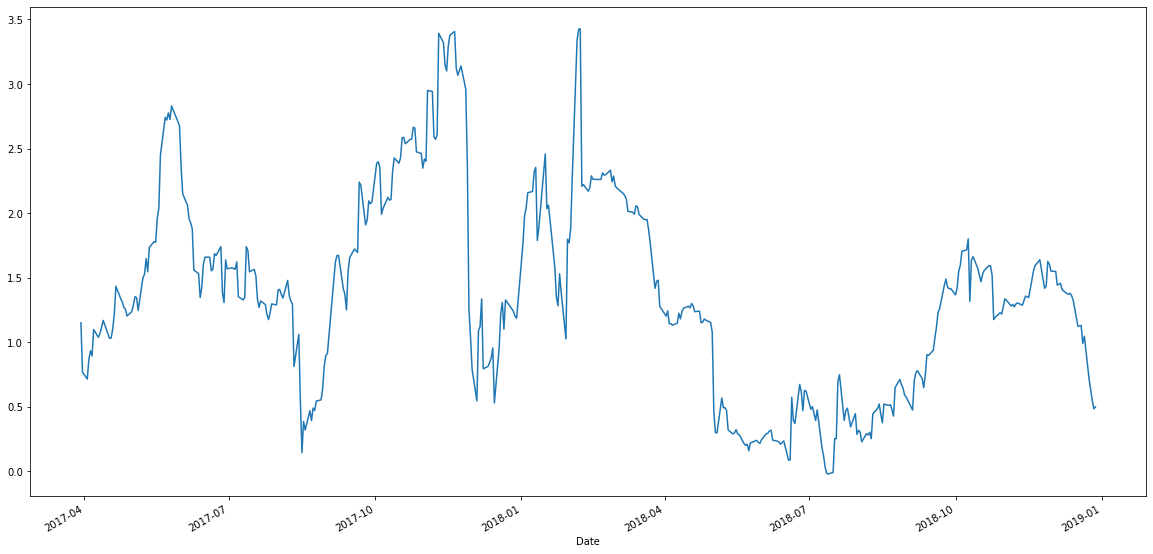

In [120]:
# Calculate and plot Beta
covariance_NEW = final_returns_df["NEW"].rolling(window=60).cov(all_returns_df["S&P500 Return"])
variance_SP500 = final_returns_df["S&P500 Return"].rolling(window=60).var()
NEW_Beta = covariance_NEW/variance_SP500
NEW_Beta.plot(figsize=(20, 10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [130]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_final = final_returns_df.mean()/final_returns_df.std()
sharpe_ratios_final

SOROS FUND MANAGEMENT LLC     -0.004038
PAULSON & CO.INC.             -0.059481
TIGER GLOBAL MANAGEMENT LLC   -0.066701
BERKSHIRE HATHAWAY INC         0.046292
Algo 1                         0.045175
Algo 2                        -0.000783
S&P500 Return                  0.027652
NEW                            0.113159
dtype: float64

<AxesSubplot:>

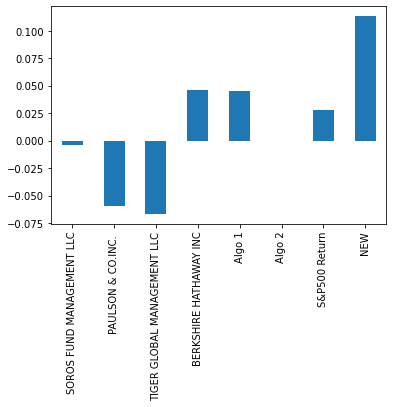

In [131]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_final.plot.bar()

### How does your portfolio do?

Write your answer here!

In [ ]:
#The new portfolio outperforms all others by at least a factor of 2